[Github https://github.com/minseo0589]

## Load packages

In [5]:
import torch
import torch.nn as nn
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline

## MNIST train, test dataset 가져오기

In [6]:
# "" : 현재 폴더에 MNIST 있음
mnist_train=dset.MNIST("", train=True,transform=transforms.ToTensor(),
                      target_transform=None, download=True)
mnist_test=dset.MNIST("", train=False,transform=transforms.ToTensor(),
                      target_transform=None, download=True)

## 대략적인 데이터 형태

mnist_train 길이: 60000
mnist_test 길이: 10000
image data 형태: torch.Size([1, 28, 28])
label:  5


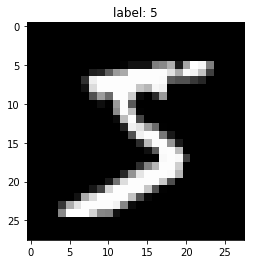

In [7]:
print "mnist_train 길이:", len(mnist_train)
print "mnist_test 길이:", len(mnist_test)

# 데이터 하나 형태
image, label = mnist_train.__getitem__(0)  #0번째 데이터
print "image data 형태:", image.size()
print "label: ", label

#그리기
img = image.numpy()  # image 타입을 numpy로 변환 (1,28,28)
plt.title("label: %d" % label)
plt.imshow(img[0], cmap='gray')
plt.show()

## MNIST data 띄워보기

5
torch.Size([1, 28, 28])
5


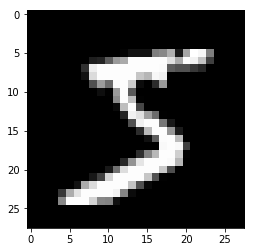

0


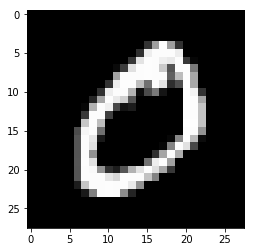

4


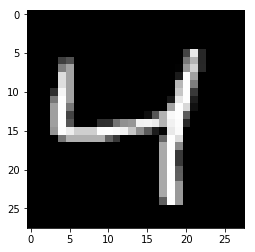

In [8]:
print(mnist_train[0][1])  #label
print(mnist_train[0][0].size())   #image

for i in range(3):
    img=mnist_train[i][0].numpy()
    print(mnist_train[i][1])
    plt.imshow(img[0],cmap='gray')
    plt.show()

## convolution 하나 씌워보기

torch.Size([1, 1, 28, 28])
5
torch.Size([1, 3, 28, 28])


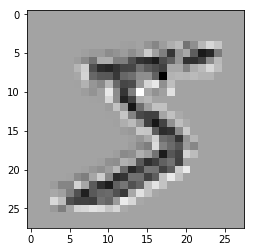

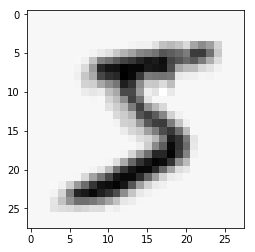

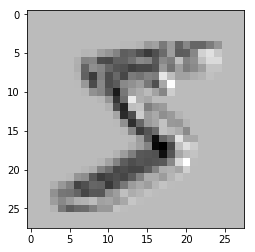

In [9]:
# mnist의 첫 번째 이미지. 라벨 가져오기
image, label = mnist_train[0]
# view: tensor의 사이즈 조절, -1: 해당 차원 확장시켜라
# [1,28,28] -> [1,1,28,28]
image=image.view(-1, image.size()[0], image.size()[1], image.size()[2])
print(image.size())

print label

# convolution filter 정의
conv_layer=nn.Conv2d(in_channels=1,out_channels=3,kernel_size=3,padding=1)
# image에 filter 적용
output=conv_layer(Variable(image))
print(output.size())

for i in range(3):
    plt.imshow(output[0,i,:,:].data.numpy(), cmap='gray')
    plt.show()

## CNN 만들기

## train, test data 가져오기

In [10]:
import numpy as np
import torch.optim as optim

batch_size = 16
learning_rate = 0.0002
num_epoch = 10  #1000

In [11]:
# 후에 학습시킬 때 batch_size 단위로 학습시켜 나감
train_loader = torch.utils.data.DataLoader(list(mnist_train)[:batch_size*100], batch_size=batch_size,   # mnist_train을 트레인 시킴
                                          shuffle=True, num_workers=2,
                                          drop_last=True)  # batch_size만큼 나눌 때 나머지는 버려라

test_loader = torch.utils.data.DataLoader((mnist_test), batch_size=batch_size,   
                                          shuffle=False, num_workers=2,
                                          drop_last=True) 

## CNN 클래스 만들기(모델 만들기)

In [12]:
class CNN(nn.Module):   # nn.Module 상속받음
    def __init__(self):
        super(CNN, self).__init__()  # 28*28
        self.layer=nn.Sequential(
            nn.Conv2d(1, 16, 5, padding=2),
            nn.ReLU(),
             
            nn.Conv2d(16, 32, 5, padding=2),    # 28*28
            nn.ReLU(),
            nn.MaxPool2d(2,2),  #28*28 -> 14*14
            
            nn.Conv2d(32, 64, 5, padding=2),    # 14*14
            nn.ReLU(),
            nn.MaxPool2d(2,2)  #14*14 -> 7*7
        )
        self.fc_layer=nn.Sequential(
            nn.Linear(64*7*7, 100),
            nn.ReLU(),
            nn.Linear(100, 10)
        )
    
    def forward(self, x):
        out = self.layer(x)
        out = out.view(batch_size, -1)
        out = self.fc_layer(out)
        return out

model = CNN()  

In [13]:
#파라미터 체크하기
for  parameter in model.parameters():
    #print(parameter)
    print(parameter.shape)

torch.Size([16, 1, 5, 5])
torch.Size([16])
torch.Size([32, 16, 5, 5])
torch.Size([32])
torch.Size([64, 32, 5, 5])
torch.Size([64])
torch.Size([100, 3136])
torch.Size([100])
torch.Size([10, 100])
torch.Size([10])


In [14]:
# loss function, optimizer 선언
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

## optimization

In [15]:
for i in range(num_epoch):
  for j, [image, label] in enumerate(train_loader):   #batch_size만큼
     x  = Variable(image)
     y_ = Variable(label)

     optimizer.zero_grad()  #optimizer 안에서 이전 gradient들을 초기화
     output=model.forward(x)
     loss = loss_func(output, y_)
     loss.backward()  # gradient 계산
     optimizer.step()  # parameter 업데이트

     if j%50==0:
       print(loss, j, i)

(tensor(2.2902, grad_fn=<NllLossBackward>), 0, 0)
(tensor(1.4980, grad_fn=<NllLossBackward>), 50, 0)
(tensor(0.5609, grad_fn=<NllLossBackward>), 0, 1)
(tensor(0.4434, grad_fn=<NllLossBackward>), 50, 1)
(tensor(0.5226, grad_fn=<NllLossBackward>), 0, 2)
(tensor(0.3551, grad_fn=<NllLossBackward>), 50, 2)
(tensor(0.3708, grad_fn=<NllLossBackward>), 0, 3)
(tensor(0.0604, grad_fn=<NllLossBackward>), 50, 3)
(tensor(0.2063, grad_fn=<NllLossBackward>), 0, 4)
(tensor(0.5950, grad_fn=<NllLossBackward>), 50, 4)
(tensor(0.3622, grad_fn=<NllLossBackward>), 0, 5)
(tensor(0.2114, grad_fn=<NllLossBackward>), 50, 5)
(tensor(0.0565, grad_fn=<NllLossBackward>), 0, 6)
(tensor(0.0858, grad_fn=<NllLossBackward>), 50, 6)
(tensor(0.0553, grad_fn=<NllLossBackward>), 0, 7)
(tensor(0.2304, grad_fn=<NllLossBackward>), 50, 7)
(tensor(0.0696, grad_fn=<NllLossBackward>), 0, 8)
(tensor(0.1082, grad_fn=<NllLossBackward>), 50, 8)
(tensor(0.0093, grad_fn=<NllLossBackward>), 0, 9)
(tensor(0.0120, grad_fn=<NllLossBackward>

In [16]:
# 모델 저장시키기
torch.save(model, 'nets/mycnn_model_%d.pkl'%(num_epoch))

/home/ec2-user/anaconda3/envs/pytorch_p27/lib/python2.7/site-packages/torch/serialization.py:360: UserWarning: Couldn't retrieve source code for container of type CNN. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [17]:
try:
  #미리 학습시킨 네트워크의 파라미터 집합 [피클]이라 발음함.
  model=torch.load('nets/mycnn_model_10.pkl')
  print("model restored")
except:
  print("model not restored")

model restored


In [20]:
def ComputeAccr(dloader, imodel):
  correct = 0
  total = 0

  for j, [imgs, labels] in enumerate(dloader): #batch_size 만큼
      img = Variable(imgs)
      label = Variable(labels)

      output = imodel.forward(img) #forward prop.
      _, output_index = torch.max(output, 1)

      total += label.size(0)
      correct += (output_index == label).sum().float()
  print("Accuracy of Test Data: {}".format(100*correct/total))

In [21]:
ComputeAccr(test_loader, model)

Accuracy of Test Data: 94.2200012207
